# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Harshith Hullkere Siddegowda
#### Student ID: S3914263

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
You should give a brief information of this assessment task here.

Task 2:Generating Feature Representations for Job Advertisement Descriptions

Task 3: Job Advertisement Classification 


## Importing libraries 

In [741]:
# importing the required libraries
import nltk
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [742]:
df = pd.read_csv('job.csv')
df

,Title,Webindex,Company,Description,token_description,category
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is c...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing
3,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and...,"['expanding', 'sales', 'team', 'recruiting', '...",Accounting_Finance
4,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and...,"['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...",Healthcare_Nursing
...,...,...,...,...,...,...
771,"Apply Today, Start Tomorrow New Sales for 2013",70457475,Motion Marketing Ltd,"Apply Today, Start Tomorrow New Sales for 201...","['apply', 'today', 'start', 'tomorrow', 'sales...",Sales
772,Assembly/Production Technicians Milton Keynes,71631590,Newstaff Employment Services Ltd,Main Purpose of Job:To perform a range of mec...,"['main', 'purpose', 'job', 'perform', 'range',...",Engineering
773,Medical Sales Executive/Associate Orthopaedics,70028343,Progress Sales Recruitment,Sales Associate – Hip and Knee Orthopaedics A...,"['sales', 'associate', 'hip', 'knee', 'orthopa...",Sales
774,Mobile Optometrist Oxford,71402732,Zest Optical,A mobile Super Optometrist is required to joi...,"['mobile', 'optometrist', 'required', 'join', ...",Healthcare_Nursing


In [744]:
title = df['Title']
title

0              Finance / Accounts Asst Bromley to ****k
1                           Fund Accountant  Hedge Fund
2                                   Deputy Home Manager
3                         Brokers Wanted Imediate Start
4                       RGN Nurses (Hospitals)  Penarth
                             ...                       
771      Apply Today, Start Tomorrow New Sales for 2013
772       Assembly/Production Technicians Milton Keynes
773     Medical Sales Executive/Associate  Orthopaedics
774                          Mobile Optometrist  Oxford
775                               Field Sales Executive
Name: Title, Length: 776, dtype: object

In [765]:
df.token_description

0      ['accountant', 'partqualified', 'south', 'east...
1      ['leading', 'hedge', 'funds', 'london', 'recru...
2      ['exciting', 'opportunity', 'arisen', 'join', ...
3      ['expanding', 'sales', 'team', 'recruiting', '...
4      ['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...
                             ...                        
771    ['apply', 'today', 'start', 'tomorrow', 'sales...
772    ['main', 'purpose', 'job', 'perform', 'range',...
773    ['sales', 'associate', 'hip', 'knee', 'orthopa...
774    ['mobile', 'optometrist', 'required', 'join', ...
775    ['title', 'field', 'sales', 'executive', 'offi...
Name: token_description, Length: 776, dtype: object

In [766]:
# Code to import libraries as you need in this assessment, e.g.,
#reading the description text file
description = './description.txt'
with open(description) as f:
    tk_description = f.read().splitlines()
   

In [767]:
print(len(tk_description))
emp = 10

tk_description[emp]

776


'client based eastleigh investments treasury controller join team duties include responsibility transactional management analysis oversight company investment portfolio including compliance relevant sections relevant policies ensure working capital liquid resources cashflow managed efficiently deliver consistently relevant kpis analysing putting action plans place process issues manage day day relationships company outsourced investment managers ensuring mutual understanding operations systems developments business efficiently effectively endtoend investment processes ensuring processes procedures risks controls documented effective efficient regularly review test processes controls accordance finance control risk framework skills experience ability build relationships stakeholders levels internal external challenge assumptions positively bring people journey strong written communication skills fluent articulate confident spoken communication understanding investment principles signifi

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

...... Sections and code blocks on buidling different document feature represetations


In [768]:
# Code to perform the task...
tk_description = [describe.split() for describe in tk_description]
tk_description[emp]
tk_description

[['accountant',
  'partqualified',
  'south',
  'east',
  'london',
  'client',
  'successful',
  'manufacturing',
  'company',
  'requirement',
  'accountant',
  'permanent',
  'role',
  'modern',
  'offices',
  'south',
  'east',
  'london',
  'role',
  'credit',
  'control',
  'purchase',
  'sales',
  'ledger',
  'daily',
  'collection',
  'debts',
  'phone',
  'letter',
  'email',
  'handling',
  'ledger',
  'accounts',
  'handling',
  'accounts',
  'negotiating',
  'payment',
  'terms',
  'cash',
  'reconciliation',
  'accounts',
  'adhoc',
  'administration',
  'duties',
  'business',
  'person',
  'ideal',
  'candidate',
  'previous',
  'experience',
  'credit',
  'control',
  'capacity',
  'possess',
  'exceptional',
  'customer',
  'service',
  'communication',
  'skills',
  'part',
  'fully',
  'qualified',
  'accountant',
  'considered',
  'role'],
 ['leading',
  'hedge',
  'funds',
  'london',
  'recruiting',
  'fund',
  'accountant',
  'join',
  'team',
  'role',
  'paying

In [783]:
#the generated Count vector representation must be based on the generated vocabulary in Task 1 (
def gen_vocIndex(voc_fname):
    with open(voc_fname) as vocf:
        vocablines = vocf.read().splitlines()
    voc_Ind = [l.split(':') for l in vocablines] 
    voc_Ind = {int(element[1]):element[0] for element in voc_Ind} 
    return voc_Ind #("{}:{}".format(voc_Ind)) 

voc_fname = './vocab.txt'
voc_dict = gen_vocIndex(voc_fname)
voc_dict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'ability',
 9: 'abreast',
 10: 'abroad',
 11: 'absence',
 12: 'absolute',
 13: 'ac',
 14: 'aca',
 15: 'academic',
 16: 'academy',
 17: 'acca',
 18: 'accept',
 19: 'acceptable',
 20: 'acceptance',
 21: 'accepted',
 22: 'access',
 23: 'accessible',
 24: 'accident',
 25: 'accommodates',
 26: 'accommodation',
 27: 'accomplished',
 28: 'accordance',
 29: 'account',
 30: 'accountabilities',
 31: 'accountability',
 32: 'accountable',
 33: 'accountancy',
 34: 'accountant',
 35: 'accountants',
 36: 'accounting',
 37: 'accounts',
 38: 'accreditation',
 39: 'accredited',
 40: 'accruals',
 41: 'accuracy',
 42: 'accurate',
 43: 'accurately',
 44: 'achievable',
 45: 'achieve',
 46: 'achieved',
 47: 'achievement',
 48: 'achievements',
 49: 'achiever',
 50: 'achieving',
 51: 'acii',
 52: 'acquired',
 53: 'acquisition',
 54: 'acquisitions',
 55: 'act',
 56: 'acting',
 57: 'action',
 58: 'action

In [775]:
from itertools import chain
words = list(chain.from_iterable([set(describe) for describe in tk_description]))

vocab = sorted(set(words))
vocab

['aap',
 'aaron',
 'aat',
 'abb',
 'abenefit',
 'aberdeen',
 'abi',
 'abilities',
 'ability',
 'abreast',
 'abroad',
 'absence',
 'absolute',
 'ac',
 'aca',
 'academic',
 'academy',
 'acca',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessible',
 'accident',
 'accommodates',
 'accommodation',
 'accomplished',
 'accordance',
 'account',
 'accountabilities',
 'accountability',
 'accountable',
 'accountancy',
 'accountant',
 'accountants',
 'accounting',
 'accounts',
 'accreditation',
 'accredited',
 'accruals',
 'accuracy',
 'accurate',
 'accurately',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achiever',
 'achieving',
 'acii',
 'acquired',
 'acquisition',
 'acquisitions',
 'act',
 'acting',
 'action',
 'actions',
 'actionscript',
 'active',
 'actively',
 'activites',
 'activities',
 'activity',
 'acts',
 'actual',
 'actuarial',
 'acumen',
 'acute',
 'ad',
 'adam',
 'adapt',
 'adaptability',
 'add',
 'added',
 'addiction',
 'adding'

In [506]:
len(vocab)

5218

In [776]:
len(words)

75499

In [779]:
from sklearn.feature_extraction.text import CountVectorizer
cVectorizer = CountVectorizer(analyzer = "word", vocabulary = vocab)
count_features = cVectorizer.fit_transform([' '.join(describe) for describe in tk_description])
print(count_features.shape)


(776, 5218)


In [781]:
print(count_features)

  (0, 34)	3
  (0, 37)	3
  (0, 94)	1
  (0, 103)	1
  (0, 622)	1
  (0, 664)	1
  (0, 672)	1
  (0, 713)	1
  (0, 839)	1
  (0, 882)	1
  (0, 918)	1
  (0, 926)	1
  (0, 1012)	1
  (0, 1068)	2
  (0, 1154)	2
  (0, 1179)	1
  (0, 1194)	1
  (0, 1231)	1
  (0, 1477)	1
  (0, 1496)	2
  (0, 1554)	1
  (0, 1722)	1
  (0, 1763)	1
  (0, 1984)	1
  (0, 2133)	2
  :	:
  (775, 4011)	1
  (775, 4139)	4
  (775, 4143)	1
  (775, 4186)	5
  (775, 4265)	1
  (775, 4282)	1
  (775, 4283)	1
  (775, 4287)	1
  (775, 4355)	1
  (775, 4390)	1
  (775, 4402)	1
  (775, 4421)	2
  (775, 4440)	1
  (775, 4616)	1
  (775, 4649)	4
  (775, 4706)	1
  (775, 4815)	1
  (775, 4830)	1
  (775, 4851)	2
  (775, 4909)	1
  (775, 5079)	1
  (775, 5164)	1
  (775, 5185)	1
  (775, 5199)	1
  (775, 5208)	1


In [860]:
count_vectors_webindex = df['Webindex'].astype(str)


## Saving Output Count_Vector.txt

In [870]:
def write_vectorFile(data_features,filename):
    num = data_features.shape[0] # the number of document
    out_file = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        out_file.write("{},".format("#"+count_vectors_webindex[a_ind]))
        for f_ind in data_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
            value = data_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
            out_file.write("{}:{},".format(f_ind,value)) # write the entry to the file in the format of word_index:value
        out_file.write('\n') # start a new line after each article
    out_file.close() # close the file       

In [871]:
cVector_file ="./count_vector.txt" 
write_vectorFile(count_features, cVector_file)

## 2. Our in-house trained Word2vec model

In [785]:
!pip install --upgrade gensim 
import gensim.downloader as api

In [552]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [553]:
!pip install python-Levenshtein

In [554]:
from gensim import utils

In [555]:
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, corpusFile):
       MyCorpus.fpath = corpusFile
    def __iter__(self):
        for line in open(self.fpath):
          yield utils.simple_preprocess(line)  

In [556]:
import gensim.models

sentences = MyCorpus('./description.txt')
description_w2v = gensim.models.Word2Vec(sentences = sentences, vector_size =100)

In [557]:
print(description_w2v)

Word2Vec<vocab=2780, vector_size=100, alpha=0.025>


In [558]:
description_W2v_wv = description_w2v.wv
print(description_W2v_wv)

KeyedVectors<vector_size=100, 2780 keys>


In [559]:
len(description_W2v_wv)

2780

In [560]:
for index, word in enumerate(description_W2v_wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(description_W2v_wv.index_to_key)} is {word}")

word #0/2780 is experience
word #1/2780 is sales
word #2/2780 is role
word #3/2780 is work
word #4/2780 is business
word #5/2780 is team
word #6/2780 is working
word #7/2780 is job
word #8/2780 is care
word #9/2780 is skills


In [561]:
try:
    vec = description_W2v_wv['h']
    print(vec)
except KeyError:
    print("The word 'happy' does not appear in model")

The word 'happy' does not appear in model


In [786]:
# save the model
description_w2v.save("description_W2v.model")

## TF-IDF weighted vector

In [790]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform([' '.join(describe) for describe in tk_description]) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [799]:
def write_vectorFile(data_features,filename):
    num = data_features.shape[0] # the number of document
    out_file = open(filename, 'w') # creates a txt file and open to save the vector representation
    for a_ind in range(0, num): # loop through each article by index
        for f_ind in data_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
            value = data_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
            out_file.write("{}:{} ".format(f_ind,value)) # write the entry to the file in the format of word_index:value
        out_file.write('\n') # start a new line after each article
    out_file.close() # close the file

In [800]:
tVector_file = "./description_tVector.txt" # file name of the tfidf vector
write_vectorFile(tfidf_features,tVector_file) # write the tfidf vector to file

In [801]:
def gen_vocIndex(voc_fname):
    with open(voc_fname) as vocf:
        vocablines = vocf.read().splitlines()
    voc_Ind = [l.split(':') for l in vocablines] 
    voc_Ind = {int(element[1]):element[0] for element in voc_Ind} 
    return voc_Ind #("{}:{}".format(voc_Ind)) 

voc_fname = './vocab.txt'
voc_dict = gen_vocIndex(voc_fname)


In [802]:
voc_dict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'ability',
 9: 'abreast',
 10: 'abroad',
 11: 'absence',
 12: 'absolute',
 13: 'ac',
 14: 'aca',
 15: 'academic',
 16: 'academy',
 17: 'acca',
 18: 'accept',
 19: 'acceptable',
 20: 'acceptance',
 21: 'accepted',
 22: 'access',
 23: 'accessible',
 24: 'accident',
 25: 'accommodates',
 26: 'accommodation',
 27: 'accomplished',
 28: 'accordance',
 29: 'account',
 30: 'accountabilities',
 31: 'accountability',
 32: 'accountable',
 33: 'accountancy',
 34: 'accountant',
 35: 'accountants',
 36: 'accounting',
 37: 'accounts',
 38: 'accreditation',
 39: 'accredited',
 40: 'accruals',
 41: 'accuracy',
 42: 'accurate',
 43: 'accurately',
 44: 'achievable',
 45: 'achieve',
 46: 'achieved',
 47: 'achievement',
 48: 'achievements',
 49: 'achiever',
 50: 'achieving',
 51: 'acii',
 52: 'acquired',
 53: 'acquisition',
 54: 'acquisitions',
 55: 'act',
 56: 'acting',
 57: 'action',
 58: 'action

In [810]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'description_tvector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)

In [811]:
tfidf_weights[0]

{'terms': '0.12814828244060425',
 'successful': '0.05796079997740923',
 'south': '0.2018635293730571',
 'skills': '0.04913453192908334',
 'service': '0.060710119751583795',
 'sales': '0.06454174417506445',
 'role': '0.12135675890098277',
 'requirement': '0.12239855316060116',
 'reconciliation': '0.13890102583022776',
 'qualified': '0.07659552107697486',
 'purchase': '0.13378223582062956',
 'previous': '0.08075436746078549',
 'possess': '0.10743973778148354',
 'phone': '0.11676459978057582',
 'person': '0.08859627508123877',
 'permanent': '0.08005535336313394',
 'payment': '0.13538699349642683',
 'partqualified': '0.16974524253473644',
 'part': '0.07041212519192294',
 'offices': '0.1128037312357935',
 'negotiating': '0.15654960114068633',
 'modern': '0.1294543605339772',
 'manufacturing': '0.09525384009006171',
 'london': '0.16491288212112942',
 'letter': '0.12570538443617763',
 'ledger': '0.2675644716412591',
 'ideal': '0.08620541715836426',
 'handling': '0.23888098357149493',
 'fully'

In [812]:
def gen_docVecs(wv,tk_decriptions,tfidf = []):
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(tk_decriptions)):
        tokens = list(set(tk_decriptions[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                temp = temp.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300)
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [813]:
weighted_descriptionW2v_dvs = gen_docVecs(description_W2v_wv,tk_description,tfidf_weights)

## TF-IDF unweighted vector

In [814]:
def gen_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # if we haven't pre-processed the articles, it's a good idea to remove stop words

    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [815]:
descriptionW2v_dvs = gen_docVecs(description_W2v_wv,tk_description)
descriptionW2v_dvs.isna().any().sum()
descriptionW2v_dvs


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-23.892971,23.675343,-2.274343,-7.358983,12.355432,-33.196693,-2.205978,41.057312,-11.197865,-6.652023,...,36.381973,4.243781,1.410485,-4.647229,34.544502,23.328129,21.981985,-17.546600,-2.864406,-5.595282
1,-18.913929,18.988739,-1.145194,-5.460064,10.043229,-25.836985,-1.924273,32.107441,-9.626866,-5.062898,...,29.237514,3.852406,-0.171073,-2.864239,28.043810,19.307644,17.570406,-14.247874,-2.376294,-4.506234
2,-46.530823,51.031395,-4.171638,-15.399048,26.248093,-62.048004,-0.290931,75.912239,-22.378870,-12.036994,...,70.595535,9.135791,1.282168,-5.627943,68.135727,46.635529,40.068184,-31.621733,-7.297856,-15.236956
3,-14.501578,16.014688,-1.405861,-3.777596,8.820372,-21.216019,-1.353634,26.749660,-8.870121,-3.858326,...,24.285011,3.248334,-0.177944,-1.899201,24.125628,15.740004,14.859964,-11.637227,-1.745805,-3.542848
4,-26.853308,38.826195,-4.782423,-5.653545,23.318302,-51.409500,-1.620979,65.927658,-26.915171,-8.607543,...,52.889580,7.855637,-1.510378,3.268326,63.095760,34.906906,36.485058,-21.255871,-2.695223,-10.207023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-2.483211,23.548704,-0.973258,1.203360,18.810389,-29.668020,4.085836,42.699665,-24.798115,-4.740582,...,33.710716,7.010563,-6.772136,8.273581,41.438747,15.379964,26.215776,-14.094882,-4.449967,-4.358666
772,-84.744316,74.335869,-3.658144,-27.984167,38.052895,-104.990555,-7.344948,129.504593,-29.682671,-21.444168,...,119.637215,11.756821,4.099554,-18.101366,105.951462,80.488327,67.271126,-61.836643,-9.439794,-16.985100
773,-91.273285,112.341461,-9.403988,-17.246344,60.306629,-155.166840,-6.175347,186.281998,-69.476883,-26.851126,...,167.915680,26.106100,-2.246373,-8.233760,174.436249,103.273750,104.688690,-76.421097,-11.980311,-25.912071
774,-36.680283,44.052902,-0.045669,-8.853317,24.464609,-61.036087,-1.816449,74.183357,-26.581427,-11.612832,...,64.988358,7.986143,-2.140786,-3.586520,66.332909,41.365803,41.623791,-29.078106,-8.179694,-11.265018


## task 3:


## before applying machine learning model I am selecting 2nd language FastText model
building second language model to perfom evaluation on the two different model performance

In [816]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove

zsh:1: command not found: wget
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [818]:
from gensim.models.fasttext import FastText

# 1. Set the corpus file names/path
corpus_file = './description.txt'

# 2. Initialise the Fast Text model
descriptionFT = FastText(vector_size=100) 

# 3. build the vocabulary
descriptionFT.build_vocab(corpus_file=corpus_file)

# 4. train the model
descriptionFT.train(
    corpus_file=corpus_file, epochs=descriptionFT.epochs,
    total_examples=descriptionFT.corpus_count, total_words=descriptionFT.corpus_total_words,
)

print(bbcFT)

FastText<vocab=2791, vector_size=100, alpha=0.025>


In [819]:
descriptionFT_wv = descriptionFT.wv


print(descriptionFT_wv)

FastTextKeyedVectors<vector_size=100, 2791 keys>


In [820]:
descriptionFT_wv['experience']

array([-8.03216279e-01,  4.04445678e-01,  7.42012588e-03, -1.39141530e-01,
        8.18451822e-01, -2.04402030e-01,  1.09102845e+00,  2.04934373e-01,
        6.45688891e-01, -1.69869184e-01,  2.73612410e-01, -5.90554178e-02,
       -4.66658086e-01,  1.90294817e-01,  2.45809153e-01,  1.39164433e-01,
        2.13231027e-01, -6.68748468e-02, -1.11921653e-02, -4.82657403e-01,
       -6.24604940e-01, -1.79161385e-01, -8.99013598e-03, -5.41700661e-01,
        7.37972616e-04, -4.71655935e-01,  2.66119510e-01, -3.06051791e-01,
       -2.78474003e-01, -1.90277305e-02, -2.54527424e-02, -2.24566668e-01,
        1.57485560e-01,  1.08991683e-01, -2.99827158e-02,  3.02679501e-02,
        4.08805400e-01,  1.03587711e+00, -6.12313509e-01,  2.25046486e-01,
        1.79968700e-01, -5.56301415e-01,  3.64036001e-02, -1.27354220e-01,
       -6.55384064e-01, -2.90977329e-01,  1.06535472e-01, -1.08176097e-01,
        7.20163286e-02, -3.24789733e-02,  3.41306776e-01,  8.68108720e-02,
       -3.59906144e-02,  

In [821]:
print('accountant' in descriptionFT_wv.key_to_index)

True


In [822]:
print(descriptionFT_wv.most_similar('accountant', topn = 10))

[('speciality', 0.9928543567657471), ('accountants', 0.9921223521232605), ('operator', 0.9919716119766235), ('troubleshooting', 0.9910882711410522), ('accountable', 0.991077721118927), ('reservoir', 0.9900814890861511), ('plant', 0.9898608922958374), ('efficient', 0.9893972277641296), ('influencing', 0.9893395304679871), ('interpreting', 0.9893391728401184)]


In [823]:
descriptionFT.save('descriptionFT.model')

In [824]:
voc_dict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'ability',
 9: 'abreast',
 10: 'abroad',
 11: 'absence',
 12: 'absolute',
 13: 'ac',
 14: 'aca',
 15: 'academic',
 16: 'academy',
 17: 'acca',
 18: 'accept',
 19: 'acceptable',
 20: 'acceptance',
 21: 'accepted',
 22: 'access',
 23: 'accessible',
 24: 'accident',
 25: 'accommodates',
 26: 'accommodation',
 27: 'accomplished',
 28: 'accordance',
 29: 'account',
 30: 'accountabilities',
 31: 'accountability',
 32: 'accountable',
 33: 'accountancy',
 34: 'accountant',
 35: 'accountants',
 36: 'accounting',
 37: 'accounts',
 38: 'accreditation',
 39: 'accredited',
 40: 'accruals',
 41: 'accuracy',
 42: 'accurate',
 43: 'accurately',
 44: 'achievable',
 45: 'achieve',
 46: 'achieved',
 47: 'achievement',
 48: 'achievements',
 49: 'achiever',
 50: 'achieving',
 51: 'acii',
 52: 'acquired',
 53: 'acquisition',
 54: 'acquisitions',
 55: 'act',
 56: 'acting',
 57: 'action',
 58: 'action

## 2nd language choosen Fast text TF-IDF Weighted vector

In [827]:
def doc_wordweights(fName_tVectors, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'description_tvector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)

In [828]:
tfidf_weights[0]

{'terms': '0.12814828244060425',
 'successful': '0.05796079997740923',
 'south': '0.2018635293730571',
 'skills': '0.04913453192908334',
 'service': '0.060710119751583795',
 'sales': '0.06454174417506445',
 'role': '0.12135675890098277',
 'requirement': '0.12239855316060116',
 'reconciliation': '0.13890102583022776',
 'qualified': '0.07659552107697486',
 'purchase': '0.13378223582062956',
 'previous': '0.08075436746078549',
 'possess': '0.10743973778148354',
 'phone': '0.11676459978057582',
 'person': '0.08859627508123877',
 'permanent': '0.08005535336313394',
 'payment': '0.13538699349642683',
 'partqualified': '0.16974524253473644',
 'part': '0.07041212519192294',
 'offices': '0.1128037312357935',
 'negotiating': '0.15654960114068633',
 'modern': '0.1294543605339772',
 'manufacturing': '0.09525384009006171',
 'london': '0.16491288212112942',
 'letter': '0.12570538443617763',
 'ledger': '0.2675644716412591',
 'ideal': '0.08620541715836426',
 'handling': '0.23888098357149493',
 'fully'

In [829]:
def gen_docVecs(wv,tk_txts,tfidf = []): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document

        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                temp = temp.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column(w0, w1, w2,........w300)
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [830]:
weighted_descriptionFT_dvs = gen_docVecs(descriptionFT_wv,tk_description,tfidf_weights)
weighted_descriptionFT_dvs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-4.186837,1.953290,-1.044024,0.151432,3.299076,-0.229037,2.723085,1.331734,3.686924,-1.804285,...,-3.062666,1.009139,1.540488,-1.009661,-1.128863,4.889883,0.041257,-1.835108,-2.844383,0.739374
1,-3.114376,1.550276,-0.914446,0.275359,2.451303,-0.137838,1.785899,0.892546,2.672746,-1.332675,...,-2.052553,0.698321,1.047016,-0.829463,-0.901530,3.605171,-0.142364,-1.293370,-2.321319,0.531621
2,-3.943090,1.438115,-1.217431,-0.444799,3.729047,-0.065086,2.101824,1.101484,4.386065,-2.094203,...,-3.805368,1.541989,1.197143,-0.824899,-2.026762,5.406339,-0.435969,-2.704945,-2.338006,0.843759
3,-3.122061,1.504508,-0.950307,0.197283,2.441848,-0.140994,1.678072,0.935218,2.777952,-1.391433,...,-2.246405,0.776500,1.030874,-0.731227,-1.075398,3.895999,-0.216156,-1.349305,-2.310001,0.548781
4,-3.975599,1.239173,-0.974160,-0.560088,2.886801,-0.017431,1.913439,1.828576,4.331828,-2.719243,...,-3.743292,1.378907,1.438462,-0.515872,-1.850165,6.014083,-0.180898,-2.297041,-1.794256,1.560917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-3.573881,0.476830,-0.491836,-1.271807,2.757688,0.516157,1.249019,1.707381,3.965950,-2.463707,...,-3.637284,1.312664,0.836732,0.352986,-1.710125,5.939087,-0.182287,-2.299432,-0.833140,2.063509
772,-8.204211,4.405929,-1.791071,1.171357,6.580538,-0.606402,6.050418,1.969439,6.393648,-2.792860,...,-4.945947,1.365770,3.174498,-2.505326,-1.540166,8.198900,0.315304,-3.198855,-6.516237,0.724474
773,-5.913542,2.663744,-1.483930,0.100822,4.587035,-0.259841,3.459720,1.903642,5.278489,-2.696425,...,-4.517903,1.521029,2.040754,-1.147975,-1.938830,7.475905,-0.158861,-2.630407,-4.022257,1.145841
774,-4.359669,1.369274,-0.675073,-0.607118,3.515460,0.097146,2.391279,1.415905,4.382696,-2.503947,...,-3.785488,1.360728,1.488423,-0.295401,-1.716425,6.195333,-0.090130,-2.786651,-2.150432,1.337619


In [637]:
def gen_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # if we haven't pre-processed the articles, it's a good idea to remove stop words

    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [638]:
descriptionFT_wv_dvs = gen_docVecs(descriptionFT_wv,tk_description)
descriptionFT_wv_dvs.isna().any().sum() # check whether there is any null values in the document vectors dataframe.

0

## Task 3. machine learning models Job Advertisement Classification

In [831]:
df['Title']
len(df['Title'])

776

#### machine learning models  (TF IDF weighted)based on the feature representations of the documents

weighted_descriptionW2v_dvs tSNE 2dimensional projected Feature space


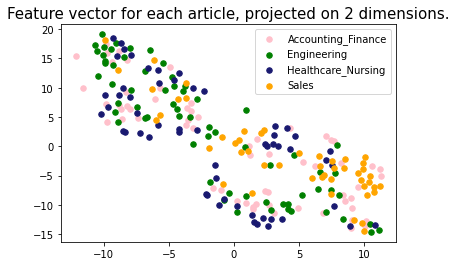

Accuracy: 0.782051282051282



weighted_descriptionFT_dvss tSNE 2dimensional projected Feature space


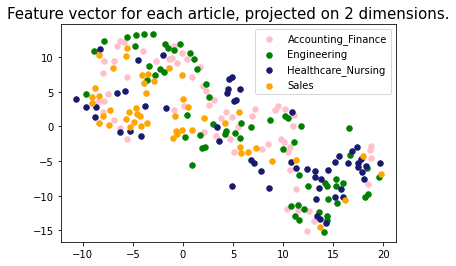

Accuracy: 0.8461538461538461





In [832]:
%matplotlib inline
seed= 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

models = [weighted_descriptionW2v_dvs, weighted_descriptionFT_dvs]
models_names = ["weighted_descriptionW2v_dvs","weighted_descriptionFT_dvss"]
for i in range(0, len(models)):
    dv = models[i]
    name = models_names[i]
    features = dv.to_numpy()
    print(name + " tSNE 2dimensional projected Feature space")
    
    plotTSNE(df['category'],features)
    
    X_train, X_test, Y_train, Y_test, train_indices,test_indices = train_test_split(dv, df['category'], list(range(0, len(df))), test_size = 0.10, random_state = 77)
    
    model = LogisticRegression(max_iter =2000, random_state = seed)
    model.fit(X_train, Y_train)
    print("Accuracy:", model.score(X_test, Y_test))
    print('\n\n')
    

In [833]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()

#### machine learning models  (unweighted)

In [834]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(descriptionW2v_dvs, df['category'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 2000,random_state=seed) # increase the max_iter to 2000 for convergence
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/harshithhs/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8599221789883269

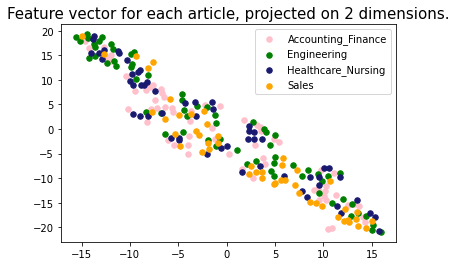

In [835]:
features = descriptionW2v_dvs.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['category'],features) # plot the tSNE to have a look

In [836]:
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(descriptionFT_wv_dvs, df['category'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 2000,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)    

/Users/harshithhs/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8365758754863813

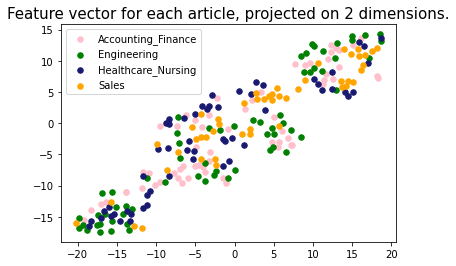

In [837]:
features = descriptionFT_wv_dvs.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['category'],features)

## cross validation

In [838]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted')

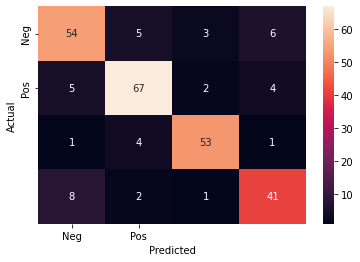

In [839]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

categories = ['Neg','Pos'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

### 5-Fold Cross Validation

In [840]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [841]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [842]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(tk_description)))):
    y_train = [str(tk_description[i]) for i in train_index]
    y_test = [str(tk_description[i]) for i in test_index]
    
    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)
    
    fold +=1

## Information Provide Higher Accuracy

In [650]:
title = df.Title.tolist()
title

[' Finance / Accounts Asst Bromley to ****k',
 ' Fund Accountant  Hedge Fund',
 ' Deputy Home Manager',
 ' Brokers Wanted Imediate Start',
 ' RGN Nurses (Hospitals)  Penarth',
 ' Production Coordinator',
 ' Scrub Nurse',
 ' Sales & Purchase Ledger Clerk  Maternity Cover',
 ' Recruitment Sales Executive',
 ' Business Development Executive  Field Sales  Dartford',
 ' Investments & Treasury Controller',
 ' European Payroll',
 ' Engineering Assessor / Instructor  South Yorkshire',
 ' International Account Manager',
 ' Senior Production Technologist (Malaysia)',
 ' Insurance Sales Executive  Horsham',
 ' Vehicle Purchaser / Car Sales',
 ' Marine Engines Specialist – Product Support',
 ' Sales Manager/Medical Sales Executive',
 ' Optical Assistant  Oxfordshire',
 ' PERM Unit Mgr RGN Kid minster Flexi ****K due',
 " PERM RGN's in Bangor CoDown  F/T Flexi  ****ph ExOpp  Bangor",
 ' Ecommerce Country Manager (Netherlands)',
 ' Business Development Manager  Leading Financial Lending PLC',
 ' Dyn

In [653]:
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain


def token_title(raw_description):
    
    description = raw_description.lower()
    #sentences = sent_tokenize(description)
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern)
    #token_lists = [tokenizer.tokenize(sen) for sen in description]
    token_lists = tokenizer.tokenize(description)
    
    #tokenised_description = list(chain.from_iterable(token_lists))
    return token_lists

In [657]:
tk_title = [token_title(r) for r in  title]
tk_title

[['finance', 'accounts', 'asst', 'bromley', 'to', 'k'],
 ['fund', 'accountant', 'hedge', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'wanted', 'imediate', 'start'],
 ['rgn', 'nurses', 'hospitals', 'penarth'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity', 'cover'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales', 'dartford'],
 ['investments', 'treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'assessor', 'instructor', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production', 'technologist', 'malaysia'],
 ['insurance', 'sales', 'executive', 'horsham'],
 ['vehicle', 'purchaser', 'car', 'sales'],
 ['marine', 'engines', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant', 'oxfordshire'],
 ['perm', 'unit', 'mgr', 'rgn', 'kid', 'minster', 'flexi', 'k', 'du

In [658]:
tk_title = [[ t for t in title if len(t)>=2]\
          for title in tk_title]
tk_title

[['finance', 'accounts', 'asst', 'bromley', 'to'],
 ['fund', 'accountant', 'hedge', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'wanted', 'imediate', 'start'],
 ['rgn', 'nurses', 'hospitals', 'penarth'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity', 'cover'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales', 'dartford'],
 ['investments', 'treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'assessor', 'instructor', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production', 'technologist', 'malaysia'],
 ['insurance', 'sales', 'executive', 'horsham'],
 ['vehicle', 'purchaser', 'car', 'sales'],
 ['marine', 'engines', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant', 'oxfordshire'],
 ['perm', 'unit', 'mgr', 'rgn', 'kid', 'minster', 'flexi', 'due'],
 ['pe

In [660]:
stopwords_en = []
with open('./stopwords_en.txt') as f:
    stopwords_en = f.read().splitlines()
print(stopwords_en)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [676]:
filtered_title = [[s for s in token if s not in stopwords_en]\
        for token in tk_title ] 
filtered_title
token_title = filtered_title
token_title

[['finance', 'accounts', 'asst', 'bromley'],
 ['fund', 'accountant', 'hedge', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'wanted', 'imediate', 'start'],
 ['rgn', 'nurses', 'hospitals', 'penarth'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity', 'cover'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales', 'dartford'],
 ['investments', 'treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'assessor', 'instructor', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production', 'technologist', 'malaysia'],
 ['insurance', 'sales', 'executive', 'horsham'],
 ['vehicle', 'purchaser', 'car', 'sales'],
 ['marine', 'engines', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant', 'oxfordshire'],
 ['perm', 'unit', 'mgr', 'rgn', 'kid', 'minster', 'flexi', 'due'],
 ['perm', "

In [671]:
from nltk.probability import *
words_title =list(chain.from_iterable(token_title))

#vocab = set(words)
words_title

['finance',
 'accounts',
 'asst',
 'bromley',
 'fund',
 'accountant',
 'hedge',
 'fund',
 'deputy',
 'home',
 'manager',
 'brokers',
 'wanted',
 'imediate',
 'start',
 'rgn',
 'nurses',
 'hospitals',
 'penarth',
 'production',
 'coordinator',
 'scrub',
 'nurse',
 'sales',
 'purchase',
 'ledger',
 'clerk',
 'maternity',
 'cover',
 'recruitment',
 'sales',
 'executive',
 'business',
 'development',
 'executive',
 'field',
 'sales',
 'dartford',
 'investments',
 'treasury',
 'controller',
 'european',
 'payroll',
 'engineering',
 'assessor',
 'instructor',
 'south',
 'yorkshire',
 'international',
 'account',
 'manager',
 'senior',
 'production',
 'technologist',
 'malaysia',
 'insurance',
 'sales',
 'executive',
 'horsham',
 'vehicle',
 'purchaser',
 'car',
 'sales',
 'marine',
 'engines',
 'specialist',
 'product',
 'support',
 'sales',
 'manager',
 'medical',
 'sales',
 'executive',
 'optical',
 'assistant',
 'oxfordshire',
 'perm',
 'unit',
 'mgr',
 'rgn',
 'kid',
 'minster',
 'flexi'

In [672]:
term_fd = FreqDist(words_title)
term_fd

FreqDist({'manager': 153, 'sales': 124, 'engineer': 109, 'senior': 56, 'nurse': 54, 'executive': 53, 'assistant': 38, 'care': 37, 'rgn': 30, 'business': 27, ...})

In [673]:
lessFreqWords = set([k for k, v in term_fd.items() if v<2])
lessFreqWords

{'abbey',
 'abi',
 'accepted',
 'accounant',
 'accountancy',
 'actions',
 'activities',
 'activity',
 'addictions',
 'adjusting',
 'administartor',
 'adolescent',
 'adult',
 'adults',
 'advanced',
 'advice',
 'adviser',
 'advisers',
 'advisors',
 'affinities',
 'agent',
 'allowance',
 'americas',
 'amigo',
 'amp',
 'analogue',
 'analystbelfast',
 'angiography',
 'application',
 'apply',
 'apprentice',
 'arm',
 'art',
 'asda',
 'asp',
 'assembler',
 'assembly',
 'assessor',
 'asset',
 'assisted',
 'assitant',
 'asst',
 'attendent',
 'audio',
 'auto',
 'autodesk',
 'automotive',
 'auxiliary',
 'avp',
 'ayrshire',
 'banking',
 'based',
 'basic',
 'basingstoke',
 'bath',
 'bdm',
 'bed',
 'bedford',
 'bedfordshire',
 'bens',
 'berks',
 'berkshire',
 'bexhill',
 'bingley',
 'blue',
 'book',
 'brand',
 'brighton',
 'broker',
 'bromsgrove',
 'burgess',
 'burscough',
 'buyside',
 'calibration',
 'cambs',
 'cannock',
 'capex',
 'card',
 'career',
 'carpets',
 'carrier',
 'cash',
 'casualty',
 'c

In [677]:
token_title = [[w for w in title if w not in lessFreqWords]\
    for title in token_title]
len(token_title)
token_title

[['finance', 'accounts', 'bromley'],
 ['fund', 'accountant', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'start'],
 ['rgn', 'nurses'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales'],
 ['treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production'],
 ['insurance', 'sales', 'executive'],
 ['vehicle', 'car', 'sales'],
 ['marine', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant'],
 ['perm', 'unit', 'rgn', 'flexi'],
 ['perm', 'bangor', 'flexi', 'ph', 'bangor'],
 ['manager'],
 ['business',
  'development',
  'manager',
  'leading',
  'financial',
  'lending',
  'plc'],
 ['dynamics', 'ax', 'finance', 'consultant', 'london'],
 ['nursing', 'home', 'manager'],
 [

In [678]:
words_2 = list(chain.from_iterable([set(title) for title in token_title]))
doc_fd = FreqDist(words_2)
most_doc_fd = doc_fd.most_common(50)
most_doc_fd

[('manager', 150),
 ('sales', 117),
 ('engineer', 108),
 ('senior', 56),
 ('nurse', 54),
 ('executive', 53),
 ('assistant', 38),
 ('care', 34),
 ('rgn', 30),
 ('business', 26),
 ('account', 25),
 ('support', 25),
 ('consultant', 24),
 ('london', 24),
 ('analyst', 24),
 ('design', 24),
 ('development', 21),
 ('home', 20),
 ('accountant', 19),
 ('field', 19),
 ('commercial', 19),
 ('finance', 18),
 ('electrical', 18),
 ('financial', 17),
 ('staff', 17),
 ('deputy', 16),
 ('maintenance', 16),
 ('mechanical', 16),
 ('software', 15),
 ('recruitment', 14),
 ('registered', 14),
 ('project', 14),
 ('worker', 14),
 ('service', 14),
 ('graduate', 13),
 ('administrator', 13),
 ('health', 12),
 ('accounts', 11),
 ('coordinator', 10),
 ('clinical', 10),
 ('technical', 10),
 ('time', 10),
 ('internal', 10),
 ('risk', 10),
 ('technician', 10),
 ('start', 9),
 ('controller', 9),
 ('south', 9),
 ('rmn', 9),
 ('audit', 9)]

In [986]:
token_title_new = [[w for w in most if w not in most_doc_fd ]\
    for most in token_title]
token_title_new

[['finance', 'accounts', 'bromley'],
 ['fund', 'accountant', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'start'],
 ['rgn', 'nurses'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales'],
 ['treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production'],
 ['insurance', 'sales', 'executive'],
 ['vehicle', 'car', 'sales'],
 ['marine', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant'],
 ['perm', 'unit', 'rgn', 'flexi'],
 ['perm', 'bangor', 'flexi', 'ph', 'bangor'],
 ['manager'],
 ['business',
  'development',
  'manager',
  'leading',
  'financial',
  'lending',
  'plc'],
 ['dynamics', 'ax', 'finance', 'consultant', 'london'],
 ['nursing', 'home', 'manager'],
 [

In [987]:
for x in token_title_new:
    
    if len(x)==0:
        
        x.append('job')

token_title_new        

[['finance', 'accounts', 'bromley'],
 ['fund', 'accountant', 'fund'],
 ['deputy', 'home', 'manager'],
 ['brokers', 'start'],
 ['rgn', 'nurses'],
 ['production', 'coordinator'],
 ['scrub', 'nurse'],
 ['sales', 'purchase', 'ledger', 'clerk', 'maternity'],
 ['recruitment', 'sales', 'executive'],
 ['business', 'development', 'executive', 'field', 'sales'],
 ['treasury', 'controller'],
 ['european', 'payroll'],
 ['engineering', 'south', 'yorkshire'],
 ['international', 'account', 'manager'],
 ['senior', 'production'],
 ['insurance', 'sales', 'executive'],
 ['vehicle', 'car', 'sales'],
 ['marine', 'specialist', 'product', 'support'],
 ['sales', 'manager', 'medical', 'sales', 'executive'],
 ['optical', 'assistant'],
 ['perm', 'unit', 'rgn', 'flexi'],
 ['perm', 'bangor', 'flexi', 'ph', 'bangor'],
 ['manager'],
 ['business',
  'development',
  'manager',
  'leading',
  'financial',
  'lending',
  'plc'],
 ['dynamics', 'ax', 'finance', 'consultant', 'london'],
 ['nursing', 'home', 'manager'],
 [

In [988]:
res = list(filter(None, token_title_new))
token_title_n = res

In [989]:
def save_description(description_Filename, token_description_n):
    out_file = open(description_Filename, 'w')
    string = "\n".join([" ".join (title)  for title in  token_title_n])
    out_file.write(string)
    out_file.close()

In [990]:
save_description('tk_title.txt',token_title_n)

In [991]:
words = list(chain.from_iterable(token_title_new))
vocab = sorted(list(set(words)))

len(vocab)
vocab


vocabulary = {k: v for v, k in enumerate(vocab)}
vocabulary

{'aberdeen': 0,
 'account': 1,
 'accountant': 2,
 'accounting': 3,
 'accounts': 4,
 'administration': 5,
 'administrator': 6,
 'advertising': 7,
 'advisor': 8,
 'agency': 9,
 'air': 10,
 'allied': 11,
 'analysis': 12,
 'analyst': 13,
 'applications': 14,
 'architect': 15,
 'area': 16,
 'asbestos': 17,
 'ashford': 18,
 'assistant': 19,
 'assistants': 20,
 'associate': 21,
 'assurance': 22,
 'audit': 23,
 'auditor': 24,
 'automation': 25,
 'ax': 26,
 'band': 27,
 'bangor': 28,
 'bank': 29,
 'barchester': 30,
 'benefits': 31,
 'bexhillonsea': 32,
 'bias': 33,
 'birmingham': 34,
 'bookkeeper': 35,
 'borer': 36,
 'bournemouth': 37,
 'branch': 38,
 'bristol': 39,
 'brokers': 40,
 'bromley': 41,
 'building': 42,
 'business': 43,
 'buyer': 44,
 'cad': 45,
 'cambridge': 46,
 'car': 47,
 'cardiff': 48,
 'care': 49,
 'carer': 50,
 'cashier': 51,
 'catering': 52,
 'central': 53,
 'centre': 54,
 'chelmsford': 55,
 'chichester': 56,
 'children': 57,
 'city': 58,
 'claims': 59,
 'clerk': 60,
 'client

In [992]:
def save_vocabulary(vocabularyfilename, vocabulary):
    out_file = open(vocabularyfilename, 'w')
    #for a in range(0, len(vocabulary)):
    for k, vocab_describe in enumerate(vocabulary):
        value = vocab_describe
        out_file.write("{}:{}\n".format(value, k))
    out_file.write('\n')
    out_file.close
save_vocabulary('vocabulary.txt', vocabulary)    

In [993]:
df['tk_title']= token_title_new

In [994]:
df

,Title,Webindex,Company,Description,token_description,category,tk_title
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South...,"['accountant', 'partqualified', 'south', 'east...",Accounting_Finance,"[finance, accounts, bromley]"
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is c...,"['leading', 'hedge', 'funds', 'london', 'recru...",Accounting_Finance,"[fund, accountant, fund]"
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an...,"['exciting', 'opportunity', 'arisen', 'join', ...",Healthcare_Nursing,"[deputy, home, manager]"
3,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and...,"['expanding', 'sales', 'team', 'recruiting', '...",Accounting_Finance,"[brokers, start]"
4,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and...,"['rgn', 'nurses', 'hospitals', 'fulltime', 'pa...",Healthcare_Nursing,"[rgn, nurses]"
...,...,...,...,...,...,...,...
771,"Apply Today, Start Tomorrow New Sales for 2013",70457475,Motion Marketing Ltd,"Apply Today, Start Tomorrow New Sales for 201...","['apply', 'today', 'start', 'tomorrow', 'sales...",Sales,"[start, sales]"
772,Assembly/Production Technicians Milton Keynes,71631590,Newstaff Employment Services Ltd,Main Purpose of Job:To perform a range of mec...,"['main', 'purpose', 'job', 'perform', 'range',...",Engineering,[production]
773,Medical Sales Executive/Associate Orthopaedics,70028343,Progress Sales Recruitment,Sales Associate – Hip and Knee Orthopaedics A...,"['sales', 'associate', 'hip', 'knee', 'orthopa...",Sales,"[medical, sales, executive, associate]"
774,Mobile Optometrist Oxford,71402732,Zest Optical,A mobile Super Optometrist is required to joi...,"['mobile', 'optometrist', 'required', 'join', ...",Healthcare_Nursing,"[mobile, optometrist]"


In [995]:
from gensim import utils
class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, corpusFile):
       MyCorpus.fpath = corpusFile
    def __iter__(self):
        for line in open(self.fpath):
          yield utils.simple_preprocess(line)  

In [996]:
import gensim.models

sentences = MyCorpus('tk_title.txt')
title_w2v = gensim.models.Word2Vec(sentences = sentences, vector_size =100)

In [997]:
print(title_w2v)

Word2Vec<vocab=119, vector_size=100, alpha=0.025>


In [998]:
title_W2v_wv = title_w2v.wv

In [999]:
len(title_W2v_wv)

119

In [1000]:
title_w2v.save("title_W2v.model")

In [1001]:
def gen_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # if we haven't pre-processed the articles, it's a good idea to remove stop words

    for i in range(0,len(tk_txts)):
        tokens = tk_txts[i]
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = temp.sum() # take the sum of each column
        docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return docs_vectors

In [1008]:
# NOTE this can take some time to finish running
titleW2v_dvs = gen_docVecs(title_W2v_wv,token_title_new)
titleW2v_dvs
#preTW2v_dvs.isna().any().sum() # check whether there is any null values in the document vectors dataframe.

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.006632,0.005422,-0.005996,-0.015540,-0.014517,-0.009041,0.002234,-0.003295,-0.014157,-0.009242,...,-0.000181,-0.010624,-0.004405,-0.003892,0.004625,-0.007712,0.000239,-0.001195,0.004272,-0.012360
1,0.005595,0.005843,0.001776,0.005722,-0.008721,0.005923,0.009635,-0.003583,0.001245,-0.005707,...,-0.000686,0.001603,-0.008568,0.008731,-0.008769,-0.009443,-0.008436,0.006990,0.005538,0.009306
2,0.011597,-0.002487,-0.003813,0.015050,0.006873,-0.015264,0.017373,0.014532,-0.007037,-0.007269,...,0.012053,-0.001099,0.011062,-0.000083,0.018152,0.014352,0.000055,-0.006709,-0.002307,0.002840
3,-0.002699,0.000227,0.002010,-0.009293,0.004925,0.003084,-0.000036,-0.003169,-0.007822,0.007372,...,-0.005484,0.008068,-0.004939,0.005893,0.009262,0.005837,-0.000998,0.005430,0.007103,-0.003840
4,-0.013913,0.009202,0.008535,-0.000828,0.010959,0.000317,0.004394,0.006612,-0.010574,-0.005515,...,-0.002346,0.010986,0.003249,0.004650,0.012074,0.009628,-0.007399,-0.000153,0.011111,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,-0.011167,0.004854,0.007149,-0.003406,0.013401,-0.005199,0.002298,0.005153,-0.011845,-0.000283,...,-0.003580,0.007593,-0.002490,-0.001878,0.008158,0.008893,0.004220,0.002105,-0.001741,0.000700
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,-0.013193,0.001507,-0.003048,-0.002800,-0.007263,-0.003983,0.016896,0.032490,-0.017627,-0.019149,...,0.017408,0.010149,-0.003060,-0.015147,0.021835,-0.001229,0.008514,-0.014958,0.009531,-0.003848
774,0.004278,0.000254,0.004786,0.002968,0.001643,-0.007281,-0.008120,-0.005470,-0.007397,0.009341,...,0.000848,-0.001475,0.006358,-0.003203,-0.003786,-0.008434,-0.003492,0.002736,-0.001580,0.000823


In [1007]:
features = titleW2v_dvs.to_numpy() # convert the document vector dataframe to a numpy array

Text(0.5, 15.0, 'Predicted')

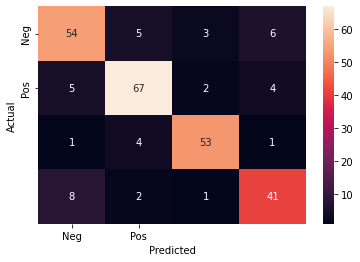

In [1009]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

categories = ['Neg','Pos'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')